In [1]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
from IPython.display import display, HTML
from matplotlib import cm
import seaborn

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import
with open("L100/Rains_mode_tot.txt", "rb") as fp:   
    Rains_mode_tot = pickle.load(fp)

with open("L100/P_mode_tot.txt", "rb") as fp:   
    P_mode_tot = pickle.load(fp)

with open("L100/W_mode_tot.txt", "rb") as fp:   
    W_mode_tot = pickle.load(fp)

with open("L100/O_mode_tot.txt", "rb") as fp:   
    O_mode_tot = pickle.load(fp)

with open("L100/Stab_mode_tot.txt", "rb") as fp:   
    Stab_mode_tot = pickle.load(fp)

with open("L100/Lmb_mode_tot.txt", "rb") as fp:   
    Lmb_mode_tot = pickle.load(fp)
    
with open("L100/color_mode.txt", "rb") as fp:   
    color_mode = pickle.load(fp)
    
with open("L100/name_mode.txt", "rb") as fp:   
    name_mode = pickle.load(fp)
    
with open("L100/param.txt", "rb") as fp:   
    param = pickle.load(fp)

N_mode_main=5
N_mode=len(P_mode_tot)

In [3]:
# Colorblind 
color_mode[0]='black'
seaborn.color_palette("colorblind")
for i in range(9):
    color_mode[i+1]=seaborn.color_palette("colorblind")[i]

color_mode[N_mode-3]=seaborn.color_palette("dark")[1]
color_mode[N_mode-2]=seaborn.color_palette("dark")[2]    
color_mode[N_mode-1]=seaborn.color_palette("dark")[3]    

# Homogeneous solution

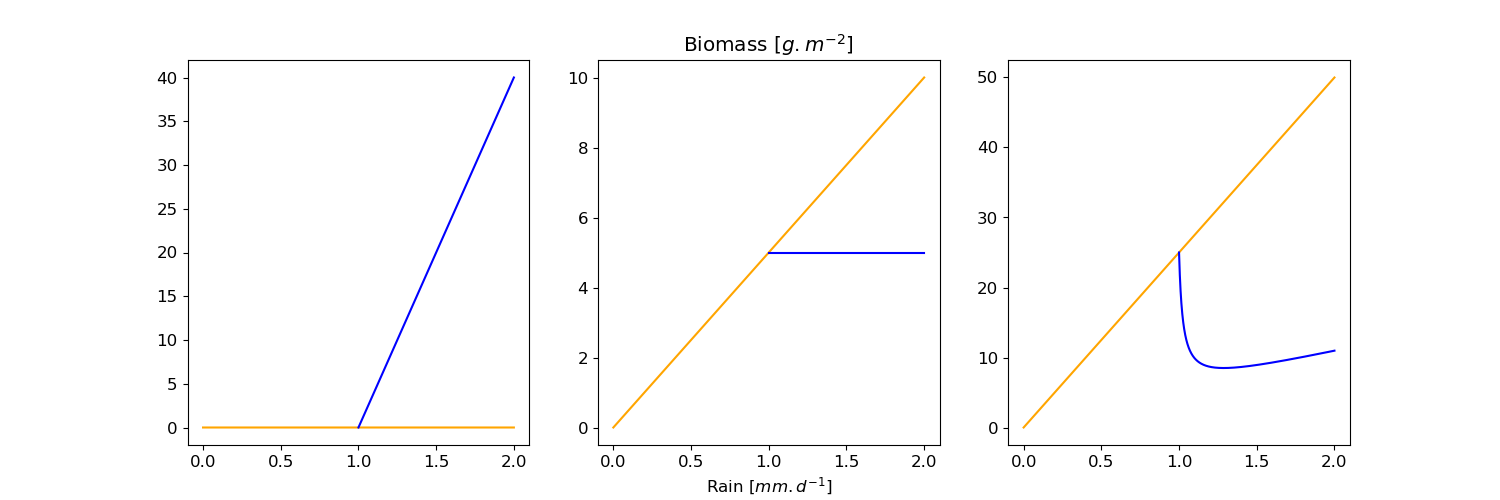

In [67]:
N1=2001
Rain_1=np.linspace(0,2,N1)

P_hom_1=np.zeros((N1))
W_hom_1=Rain_1*np.ones((N1))/param['rw']
O_hom_1=Rain_1*np.ones((N1))/(param['w0']*param['alpha'])
                        
                            
N2=1001
Rain_2=np.linspace(1,2,N2)
P_hom_2=param['c']*((Rain_2/param['d'])-((param['k1']*param['rw'])/((param['c']*param['gmax']-param['d']))))
W_hom_2=(param['d']*param['k1'])/(param['c']*param['gmax']-param['d'])*np.ones(N2)
O_hom_2=Rain_2*((param['c']*param['gmax']-param['d'])*(param['c']*Rain_2+param['d']*param['k2'])-param['c']*param['d']*param['k1']*param['rw'])/(param['alpha']*((param['c']*param['gmax']-param['d'])*(param['c']*Rain_2+param['d']*param['k2']*param['w0'])-param['c']*param['d']*param['k1']*param['rw']))
#O_hom_2=(Rain_2*(-4.375 + 5.0*Rain_2))/(-0.975 + Rain_2)

fig,axes=plt.subplots(1,3,figsize=(15,5))

axes[0].plot(Rain_1,P_hom_1,color='orange')
axes[0].plot(Rain_2,P_hom_2,color='blue')
axes[1].plot(Rain_1,W_hom_1,color='orange')
axes[1].plot(Rain_2,W_hom_2,color='blue')
axes[2].plot(Rain_1,O_hom_1,color='orange')
axes[2].plot(Rain_2,O_hom_2,color='blue')
axes[1].set_title('Biomass $[g.m^{-2}]$')
axes[1].set_xlabel('Rain $[mm.d^{-1}$]')
fig.savefig('figure/Homogeneous.pdf',bbox_inches='tight')

# Contour of $\Omega$

Number of points in the x-axis: 1->1.3 with dR=0.001 now before 0.005
Number of points in the y-axis: (kappa)140/ deux fois ca 281?

[[1.    1.    1.    1.    1.   ]
 [1.005 1.005 1.005 1.005 1.005]
 [1.01  1.01  1.01  1.01  1.01 ]
 [1.015 1.015 1.015 1.015 1.015]
 [1.02  1.02  1.02  1.02  1.02 ]]
[[0.    0.005 0.01  0.015 0.02 ]
 [0.    0.005 0.01  0.015 0.02 ]
 [0.    0.005 0.01  0.015 0.02 ]
 [0.    0.005 0.01  0.015 0.02 ]
 [0.    0.005 0.01  0.015 0.02 ]]
[[-2.25983281e-05 -2.35027902e-05 -2.71741188e-05 -3.53299213e-05
  -4.90400202e-05]
 [-9.91854989e-04  2.75152838e-04  2.80926705e-03  5.24132198e-03
   7.19371017e-03]
 [-2.81535597e-03 -5.34693075e-05  4.43302581e-03  8.29267132e-03
   1.12963912e-02]
 [-6.00212644e-03 -1.02009119e-03  5.02286642e-03  9.81998582e-03
   1.34981972e-02]
 [            nan -2.52974358e-03  4.87581638e-03  1.03617038e-02
   1.45288494e-02]]


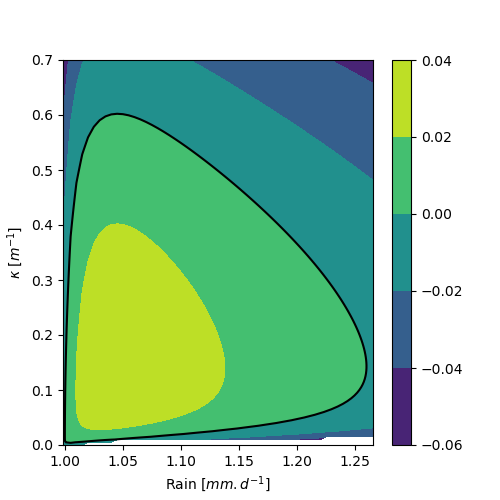

In [9]:
omega=np.loadtxt('omega_data.dat')



R=np.reshape(omega[:,0],(61,141))
Kappa=np.reshape(omega[:,1],(61,141))
Omega=np.reshape(omega[:,2],(61,141))
print(R[:5,:5])
print(Kappa[:5,:5])
print(Omega[:5,:5])



fig,ax=plt.subplots(1,1,figsize=(5,5))
c=np.linspace(np.nanmin(Omega),np.nanmax(Omega),1001)
c=np.array([-0.06,-0.04,-0.02,0,0.02,0.04])
Ax1=ax.contourf(R,Kappa,Omega,levels=c)
c=np.array([0])
Ax2=ax.contour(Ax1,levels=c,colors=('k',))
#ax.clabel(Ax2, fmt='%2.1f', colors='w', fontsize=14)
ax.set_xlabel('Rain $[mm.d^{-1}$]')
ax.set_ylabel(r'$\kappa$ $[m^{-1}$]')
plt.colorbar(Ax1)
ax.set_xlim((0.998,1.265))
fig.savefig('figure/eigen.pdf',bbox_inches='tight')

[[1.    1.    1.    1.    1.   ]
 [1.001 1.001 1.001 1.001 1.001]
 [1.002 1.002 1.002 1.002 1.002]
 [1.003 1.003 1.003 1.003 1.003]
 [1.004 1.004 1.004 1.004 1.004]]
[[0.    0.001 0.002 0.003 0.004]
 [0.    0.001 0.002 0.003 0.004]
 [0.    0.001 0.002 0.003 0.004]
 [0.    0.001 0.002 0.003 0.004]
 [0.    0.001 0.002 0.003 0.004]]
[[-2.25983281e-05 -2.26306940e-05 -2.27298026e-05 -2.29015094e-05
  -2.31552377e-05]
 [-1.59087337e-04 -1.48862883e-04 -1.18558317e-04 -6.92444949e-05
  -2.59586130e-06]
 [-3.22531928e-04 -3.01474006e-04 -2.39200859e-04 -1.38304273e-04
  -2.76682036e-06]
 [-5.14748041e-04 -4.82235474e-04 -3.86340593e-04 -2.31742137e-04
  -2.54871368e-05]
 [-7.37175703e-04 -6.92520549e-04 -5.61208068e-04 -3.50704339e-04
  -7.19969545e-05]]


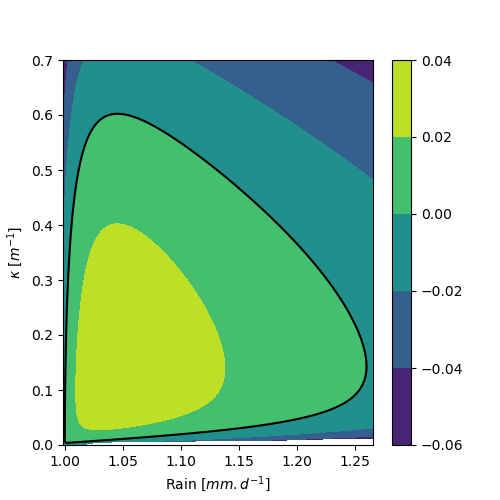

In [10]:
omega=np.loadtxt('omega_data_2.dat')



R=np.reshape(omega[:,0],(301,701))
Kappa=np.reshape(omega[:,1],(301,701))
Omega=np.reshape(omega[:,2],(301,701))
print(R[:5,:5])
print(Kappa[:5,:5])
print(Omega[:5,:5])



fig,ax=plt.subplots(1,1,figsize=(5,5))
c=np.linspace(np.nanmin(Omega),np.nanmax(Omega),1001)
c=np.array([-0.06,-0.04,-0.02,0,0.02,0.04])
Ax1=ax.contourf(R,Kappa,Omega,levels=c)
c=np.array([0])
Ax2=ax.contour(Ax1,levels=c,colors=('k',))
#ax.clabel(Ax2, fmt='%2.1f', colors='w', fontsize=14)
ax.set_xlabel('Rain $[mm.d^{-1}$]')
ax.set_ylabel(r'$\kappa$ $[m^{-1}$]')
plt.colorbar(Ax1)
ax.set_xlim((0.998,1.265))
fig.savefig('figure/eigen.pdf',bbox_inches='tight')

(2604, 7)


/opt/easybuild/soft/2021b/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


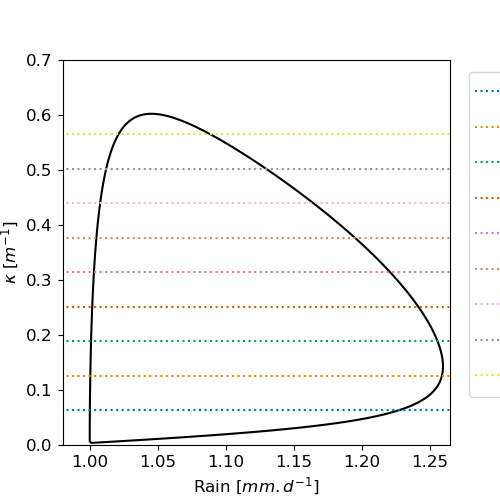

In [63]:
kappa=np.flip(np.loadtxt('Guesses.dat'),axis=0)
print(kappa.shape)
L=100
plt.rc('font', size=12) 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
#ax.fill_between(kappa[:,0],kappa[:,1],kappa[:,2],hatch='\\',edgecolor='b',facecolor='none',label='$\Omega >0$')
#ax.plot(kappa[:,0],kappa[:,1],'k')
#ax.plot(kappa[:,0],kappa[:,2],'k')
c=np.array([0])
Ax2=ax.contour(R,Kappa,Omega,levels=c,colors=('k',))
ax.set_xlabel('Rain $[mm.d^{-1}$]')
ax.set_ylabel(r'$\kappa$ $[m^{-1}$]')
for i in range(np.shape(color_mode)[0]-5):
    y=(i+1)*2*np.pi/L
    ax.hlines(y,0.8,1.5,color_mode[i+1],label=r'$\kappa=$ %d $\frac{2 \pi}{L}$'%(i+1),linestyle='dotted')
ax.legend(bbox_to_anchor=(1.4,0.99))
ax.set_xlim((0.98,1.265))
fig.savefig('figure/zeroModesL100.pdf',bbox_inches='tight')

14
14
14
14


Text(0.5, 0, 'Rain $[mm.d^{-1}$]')

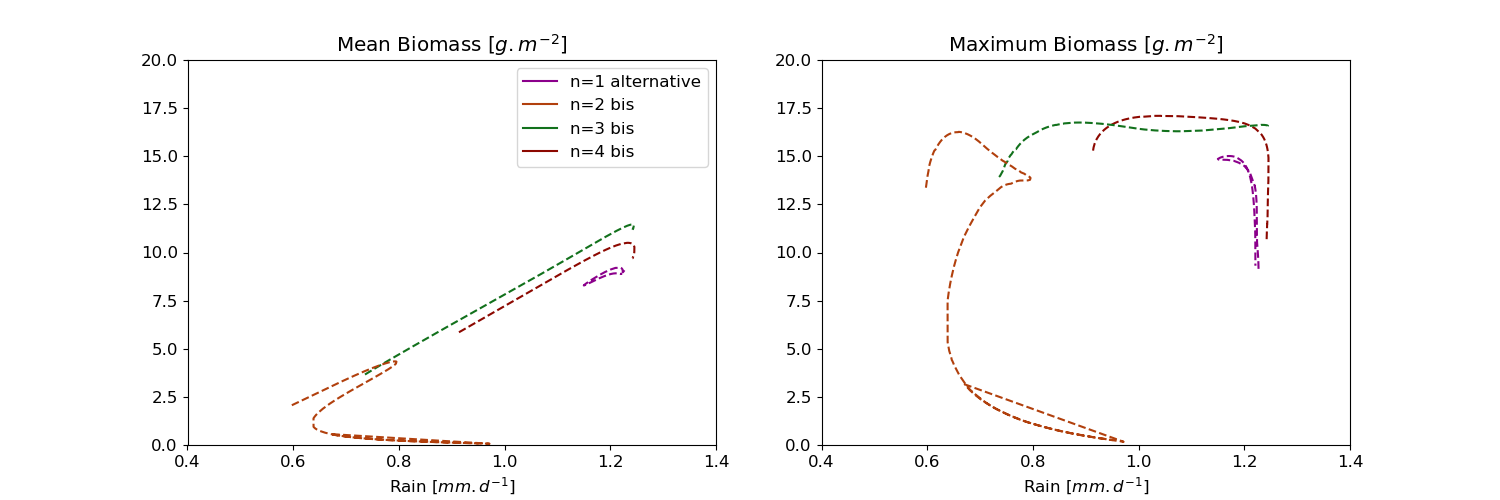

In [6]:
import matplotlib

k=np.linspace(0,N_mode,N_mode+1)

norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

print(len(Stab_mode_tot))
print(len(Rains_mode_tot))
print(len(color_mode))
print(len(name_mode))
plt.rc('font', size=12) 
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(N_mode-4,N_mode):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i])
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i])
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i])
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=color_mode[i],label=name_mode[i],zorder=Zorder[i])
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$')
ax[0].set_xlabel('Rain $[mm.d^{-1}]$')
ax[0].legend()
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass $[g.m^{-2}]$')
ax[1].set_xlabel('Rain $[mm.d^{-1}$]')
#ax[1].legend()
#plt.savefig('figure/bif_diag_100.pdf',dpi=500,bbox_inches='tight')

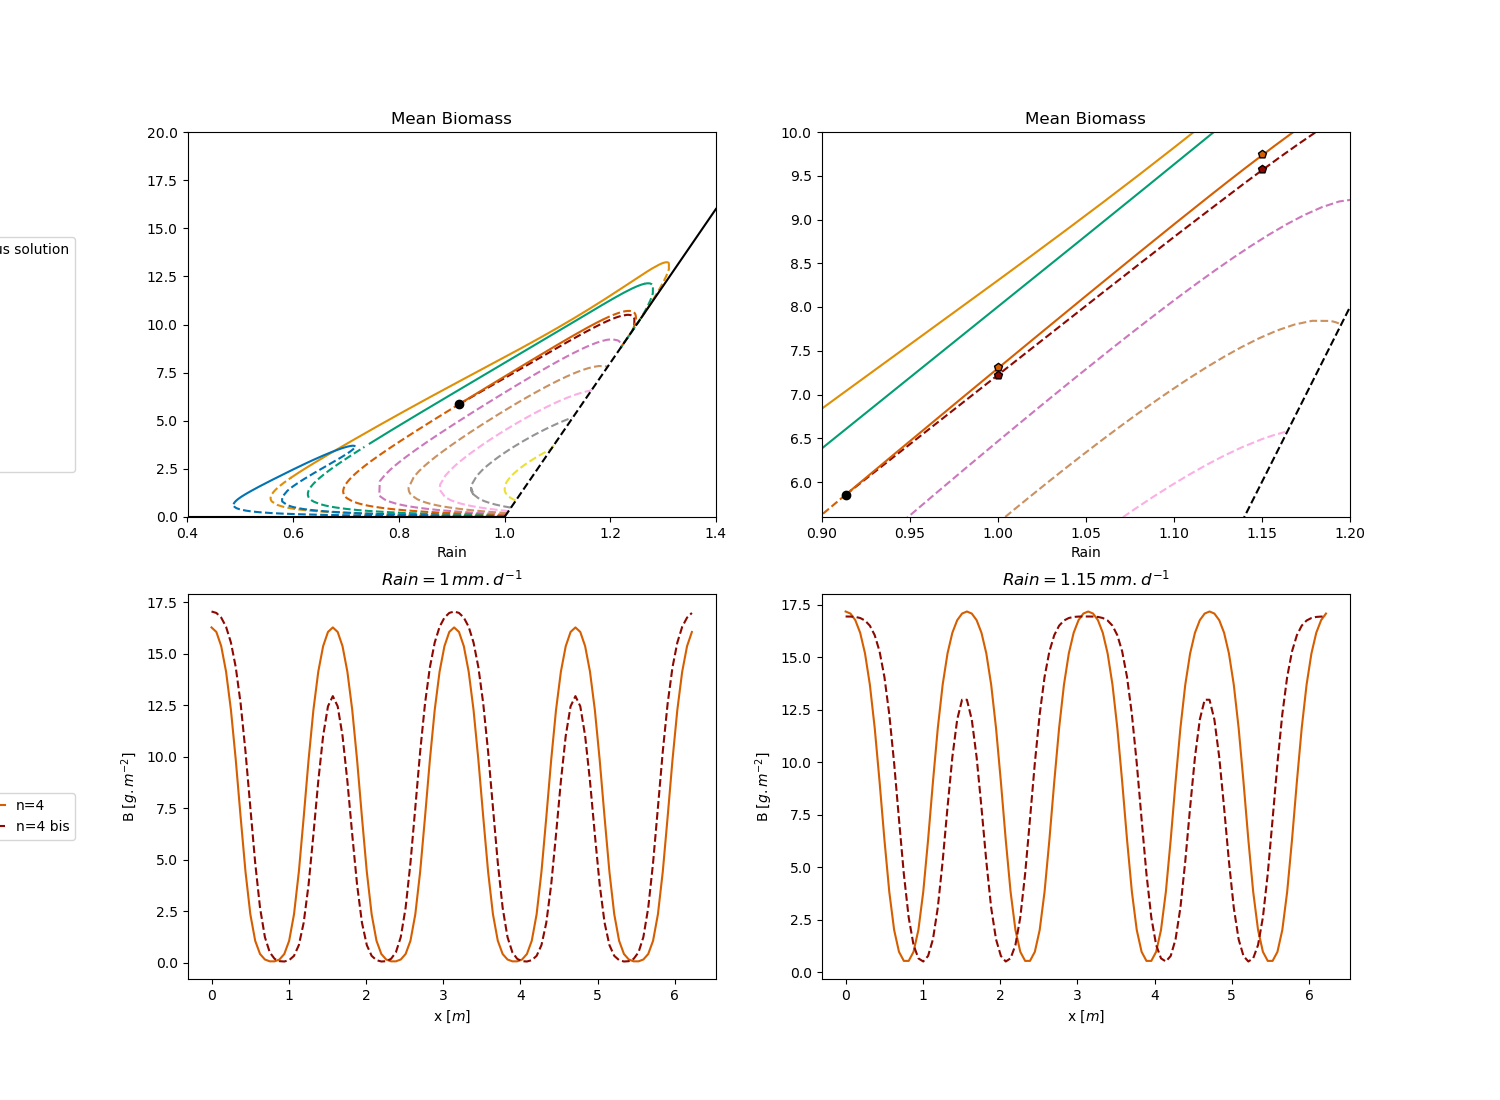

In [11]:
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(2,2,figsize=(15,11))
a=[0,1,2,3,4,5,6,7,8,9]
bot=0
for i in a:
    ax[0,0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i])
    ax[0,0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i]) 
    ax[0,1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i])
    ax[0,1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i]) 
ax[0,0].plot(np.ma.masked_where(True^Stab_mode_tot[N_mode-1], Rains_mode_tot[N_mode-1]),np.ma.masked_where(True^Stab_mode_tot[N_mode-1][bot:], np.mean(P_mode_tot[N_mode-1],axis=1)),linestyle='dashed',markersize=1,color=color_mode[N_mode-1],zorder=Zorder[N_mode-1])
ax[0,0].plot(np.ma.masked_where(Stab_mode_tot[N_mode-1], Rains_mode_tot[N_mode-1]),np.ma.masked_where(Stab_mode_tot[N_mode-1], np.mean(P_mode_tot[N_mode-1],axis=1)),markersize=4,color=color_mode[N_mode-1],label=name_mode[N_mode-1],linestyle='solid',zorder=Zorder[i])
ax[0,1].plot(np.ma.masked_where(True^Stab_mode_tot[N_mode-1], Rains_mode_tot[N_mode-1]),np.ma.masked_where(True^Stab_mode_tot[N_mode-1][bot:], np.mean(P_mode_tot[N_mode-1],axis=1)),linestyle='dashed',markersize=1,color=color_mode[N_mode-1],zorder=Zorder[N_mode-1])
ax[0,1].plot(np.ma.masked_where(Stab_mode_tot[N_mode-1], Rains_mode_tot[N_mode-1]),np.ma.masked_where(Stab_mode_tot[N_mode-1], np.mean(P_mode_tot[N_mode-1],axis=1)),markersize=4,color=color_mode[N_mode-1],label=name_mode[N_mode-1],linestyle='solid',zorder=Zorder[i])

ax[0,0].plot(Rains_mode_tot[N_mode-1][0],np.mean(P_mode_tot[N_mode-1][0]),marker='o',color='black')
ax[0,1].plot(Rains_mode_tot[N_mode-1][0],np.mean(P_mode_tot[N_mode-1][0]),marker='o',color='black')
#Find the solution to show along the branches 
rain1=1
n_mode=4
ind_01=selec_rain(rain1,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
n_mode=N_mode-1
ind_11=selec_rain(rain1,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
rain2=1.15
n_mode=4
ind_02=selec_rain(rain2,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
n_mode=N_mode-1
ind_12=selec_rain(rain2,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]


ax[0,1].scatter(rain1,np.mean(P_mode_tot[4][ind_01]),marker='p',color=color_mode[4],edgecolors= "black")
ax[0,1].scatter(rain2,np.mean(P_mode_tot[4][ind_02]),marker='p',color=color_mode[4],edgecolors= "black")
ax[0,1].scatter(rain1,np.mean(P_mode_tot[N_mode-1][ind_11]),marker='p',color=color_mode[N_mode-1],edgecolors= "black")
ax[0,1].scatter(rain2,np.mean(P_mode_tot[N_mode-1][ind_12]),marker='p',color=color_mode[N_mode-1],edgecolors= "black")

ax[0,0].legend(bbox_to_anchor=(-0.2,0.1))
ax[0,0].set_xlim(0.4,1.4)
ax[0,0].set_ylim(0,20)
ax[0,0].set_title('Mean Biomass')
ax[0,0].set_xlabel('Rain')
ax[0,1].set_xlim(0.9,1.2)
ax[0,1].set_ylim(5.6,10)
ax[0,1].set_title('Mean Biomass')
ax[0,1].set_xlabel('Rain')
ax[1,0].plot(x,P_mode_tot[4][ind_01],color=color_mode[4],label='n=4')
ax[1,0].plot(x,P_mode_tot[N_mode-1][ind_11],color=color_mode[N_mode-1],linestyle='dashed',label='n=4 bis')
ax[1,1].plot(x,P_mode_tot[4][ind_02],color=color_mode[4],label='n=4')
ax[1,1].plot(x,P_mode_tot[N_mode-1][ind_12],color=color_mode[N_mode-1],linestyle='dashed',label='n=4 bis')

ax[1,0].legend(bbox_to_anchor=(-0.2,0.5))

ax[1,0].set_title('$Rain = 1 \, mm.d^{-1}$')
ax[1,0].set_xlabel('x $[m]$')
ax[1,0].set_ylabel('B $[g.m^{-2}]$')
ax[1,1].set_title('$Rain = 1.15 \, mm.d^{-1}$')
ax[1,1].set_xlabel('x $[m]$')
ax[1,1].set_ylabel('B $[g.m^{-2}]$')

plt.savefig('figure/MState.pdf',dpi=500,bbox_inches='tight')

100
100


/opt/easybuild/soft/2021b/software/matplotlib/3.4.3-foss-2021b/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/easybuild/soft/2021b/software/matplotlib/3.4.3-foss-2021b/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/easybuild/soft/2021b/software/matplotlib/3.4.3-foss-2021b/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


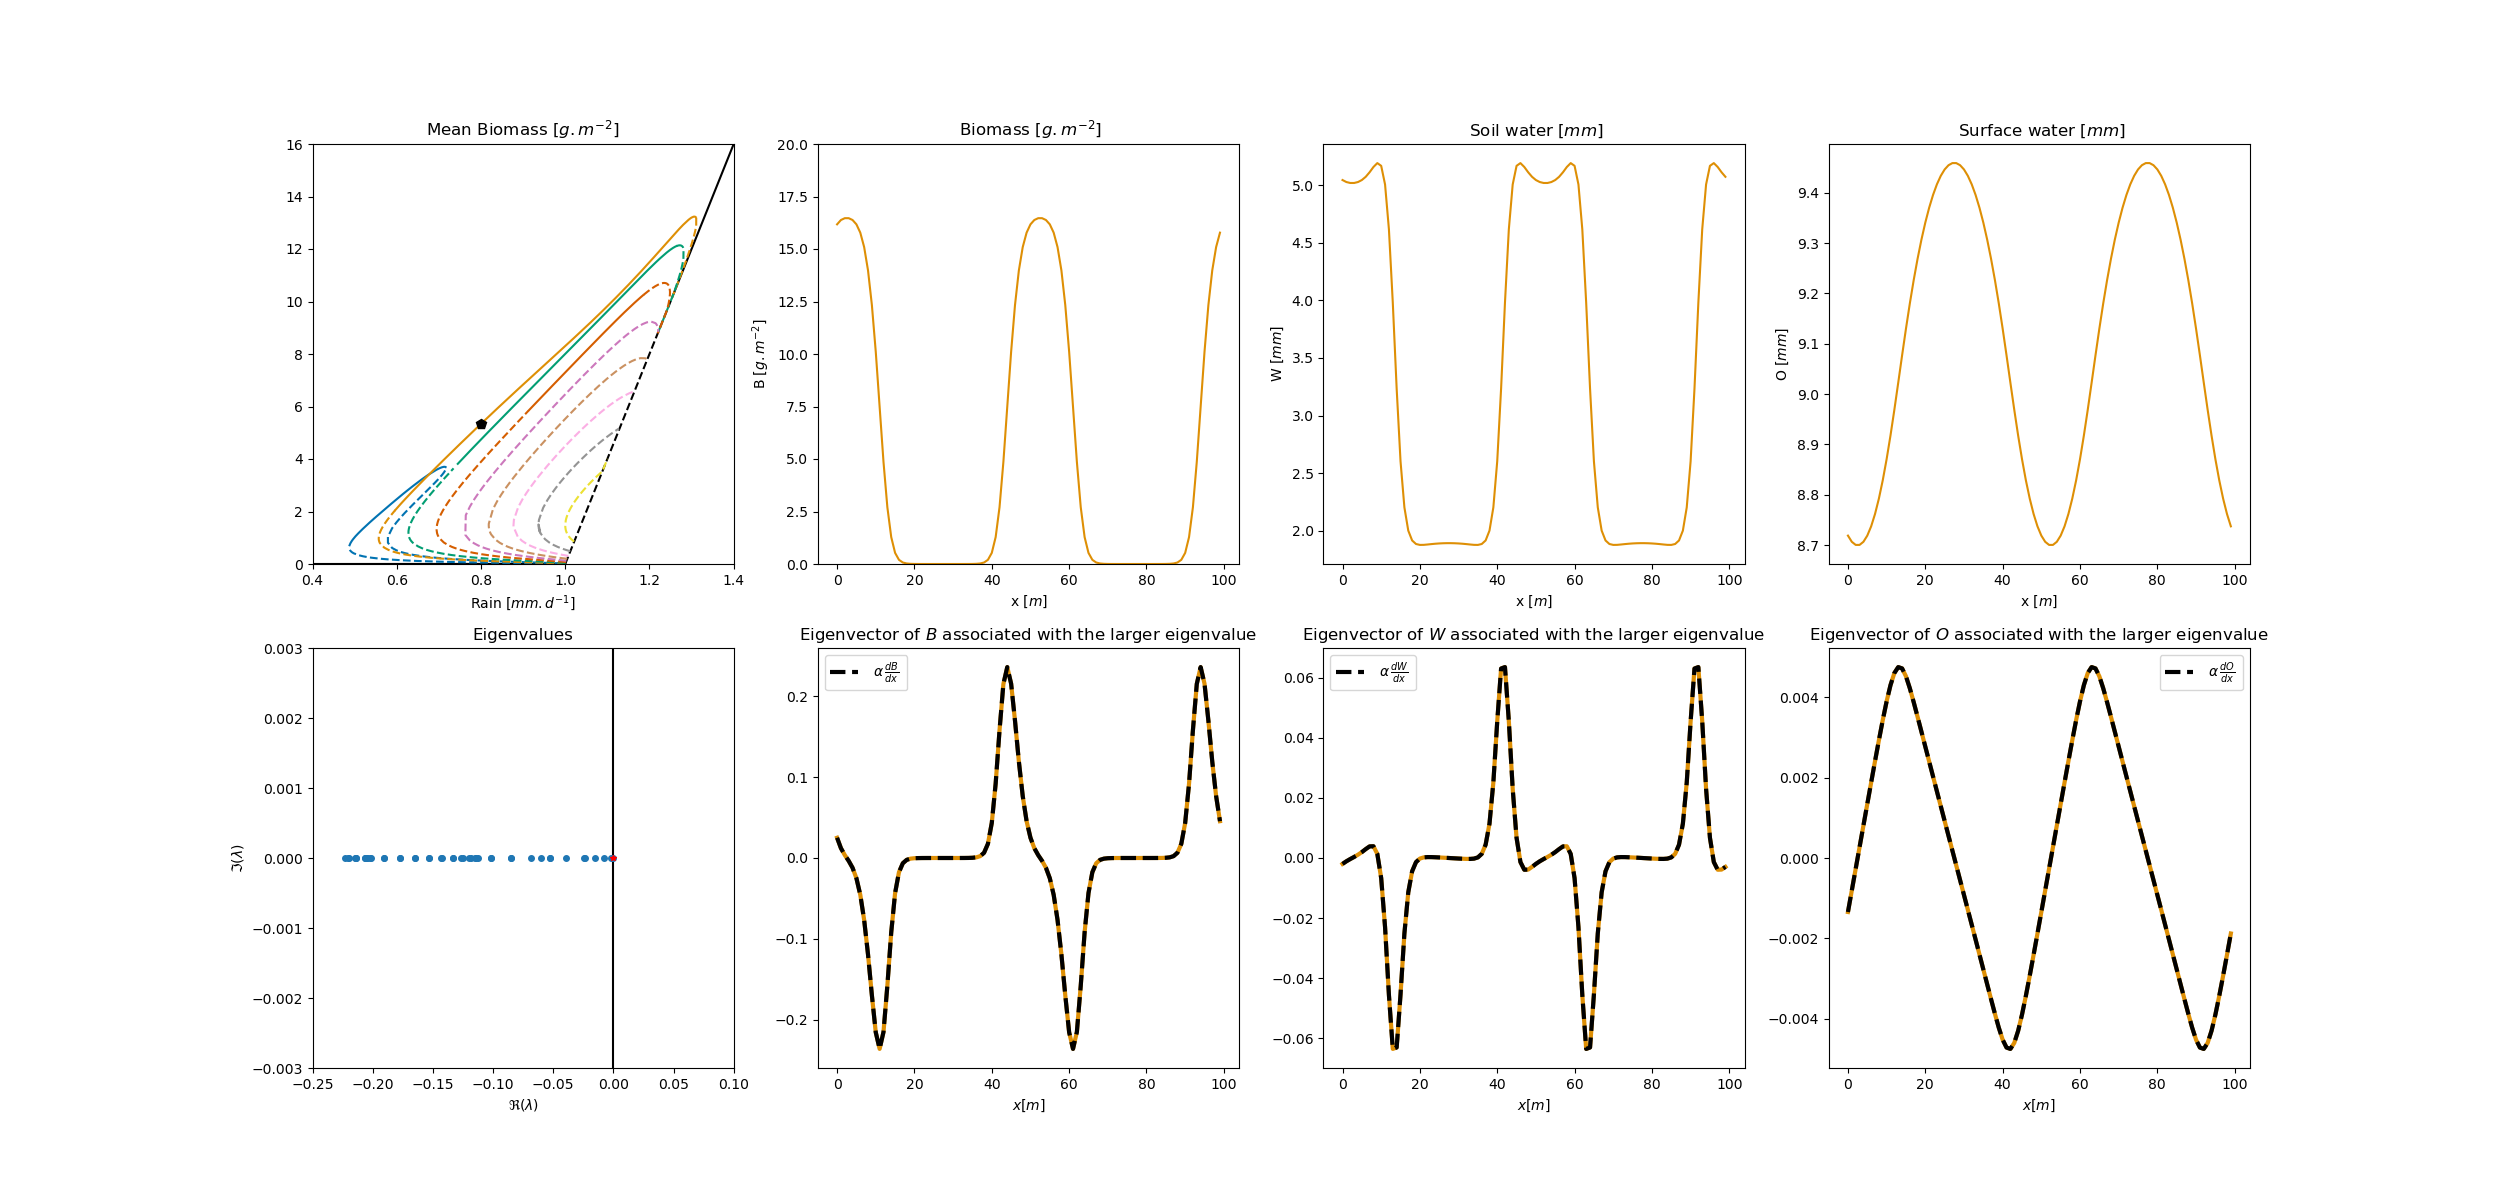

In [35]:
rain=0.8
eps=0.001
n=0
n_mode=2
ind=selec_rain(rain,5,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)


x=x/(2*np.pi)*L
fig,ax=plt.subplots(2,4,figsize=(25,12))
for i in range(N_mode-4):
    ax[0,0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i])
    ax[0,0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=8,color=color_mode[i],label=name_mode[i])  
ax[0,0].set_xlim(0.4,1.4)
ax[0,0].set_ylim(0,16)
ax[0,0].plot(Rains_mode_tot[n_mode][ind],np.mean(P_mode_tot[n_mode][ind]),marker='p',color='black',linestyle='none',label='Solution shown',markersize=7)
ax[0,0].set_title('Mean Biomass $[g.m^{-2}]$')
ax[0,0].set_xlabel('Rain $[mm.d^{-1}]$')
#ax[0].legend(bbox_to_anchor=(-0.1,0.3))
ax[0,1].plot(x,np.squeeze(P_mode_tot[n_mode][ind]),color=color_mode[n_mode])
ax[0,1].set_title(' Biomass $[g.m^{-2}]$')
ax[0,1].set_xlabel('x $[m]$')
ax[0,1].set_ylabel('B $[g.m^{-2}]$')
ax[0,1].set_ylim((0,20))
ax[0,2].plot(x,np.squeeze(W_mode_tot[n_mode][ind]),color=color_mode[n_mode])
ax[0,2].set_title(' Soil water $[mm]$')
ax[0,2].set_xlabel('x $[m]$')
ax[0,2].set_ylabel('W $[mm]$')
#ax[2].set_ylim((0,20))
ax[0,3].plot(x,np.squeeze(O_mode_tot[n_mode][ind]),color=color_mode[n_mode])
ax[0,3].set_title(' Surface water $[mm]$')
ax[0,3].set_xlabel('x $[m]$')
ax[0,3].set_ylabel('O $[mm]$')
#ax[3].set_ylim((0,20))
#######################################
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)
N=P_mode_tot[n_mode][ind,:].T.shape[0]
print(N)
x=np.arange(0,L,L/N)
dx=L/N
#evaluation of the derivatives
q = (2*np.pi/L)*np.linspace(-int(N/2),int(N/2)-1,N)
P_k=np.fft.fftshift(np.fft.fft(np.squeeze(P_mode_tot[n_mode][ind])))
dPdx=np.fft.ifft(np.fft.ifftshift(1j*q*P_k))
W_k=np.fft.fftshift(np.fft.fft(np.squeeze(W_mode_tot[n_mode][ind])))
dWdx=np.fft.ifft(np.fft.ifftshift(1j*q*W_k))
O_k=np.fft.fftshift(np.fft.fft(np.squeeze(O_mode_tot[n_mode][ind])))
dOdx=np.fft.ifft(np.fft.ifftshift(1j*q*O_k))

ratioP=np.max(dPdx)/np.max(np.real(vec[:N,0]))
ratioW=np.max(dWdx)/np.max(np.real(vec[N:2*N,0]))
ratioO=np.max(dOdx)/np.max(np.real(vec[2*N:,0]))

ax[1,0].plot(np.real(lmb)[:50],np.imag(lmb)[:50],marker='o',linestyle='none',markersize=4)
ax[1,0].plot(np.real(lmb)[0],np.imag(lmb)[0],marker='*',color='red',linestyle='none',markersize=4)
ax[1,0].set_xlim((-0.25,0.1))
ax[1,0].set_xlabel('$\Re (\lambda)$')
ax[1,0].set_ylabel('$\Im (\lambda)$')
ax[1,0].set_title('Eigenvalues')
ax[1,0].vlines(0,-1,1,color='black')
ax[1,0].set_ylim((-0.003,0.003))
#plt.savefig('eigenV.png')
ax[1,1].plot(x,np.real(vec[:N,0]),linewidth=3,color=color_mode[n_mode])
ax[1,1].plot(x,dPdx/ratioP,color='black',linestyle='dashed',linewidth=3,label=r' $ \alpha \, \frac{dB}{dx} $ ')
ax[1,1].legend()
ax[1,1].set_xlabel('$x [m]$')
ax[1,1].set_title('Eigenvector of $B$ associated with the larger eigenvalue')
ax[1,2].plot(x,np.real(vec[N:2*N,0]),linewidth=3,color=color_mode[n_mode])
ax[1,2].plot(x,dWdx/ratioW,color='black',linestyle='dashed',linewidth=3,label=r' $ \alpha \, \frac{dW}{dx} $ ')
ax[1,2].set_xlabel('$x [m]$')
ax[1,2].legend()
ax[1,2].set_title('Eigenvector of $W$ associated with the larger eigenvalue')
ax[1,3].plot(x,np.real(vec[2*N:,0]),linewidth=3,color=color_mode[n_mode])
ax[1,3].plot(x,dOdx/ratioO,color='black',linestyle='dashed',linewidth=3,label=r' $ \alpha \, \frac{dO}{dx} $ ')
ax[1,3].legend()
ax[1,3].set_xlabel('$x [m]$')
ax[1,3].set_title('Eigenvector of $O$ associated with the larger eigenvalue')
fig.savefig('figure/n=2_09+eig.pdf',dpi=500,bbox_inches='tight')

100
100


/opt/easybuild/soft/2021b/software/matplotlib/3.4.3-foss-2021b/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/easybuild/soft/2021b/software/matplotlib/3.4.3-foss-2021b/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/easybuild/soft/2021b/software/matplotlib/3.4.3-foss-2021b/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$x [m]$')

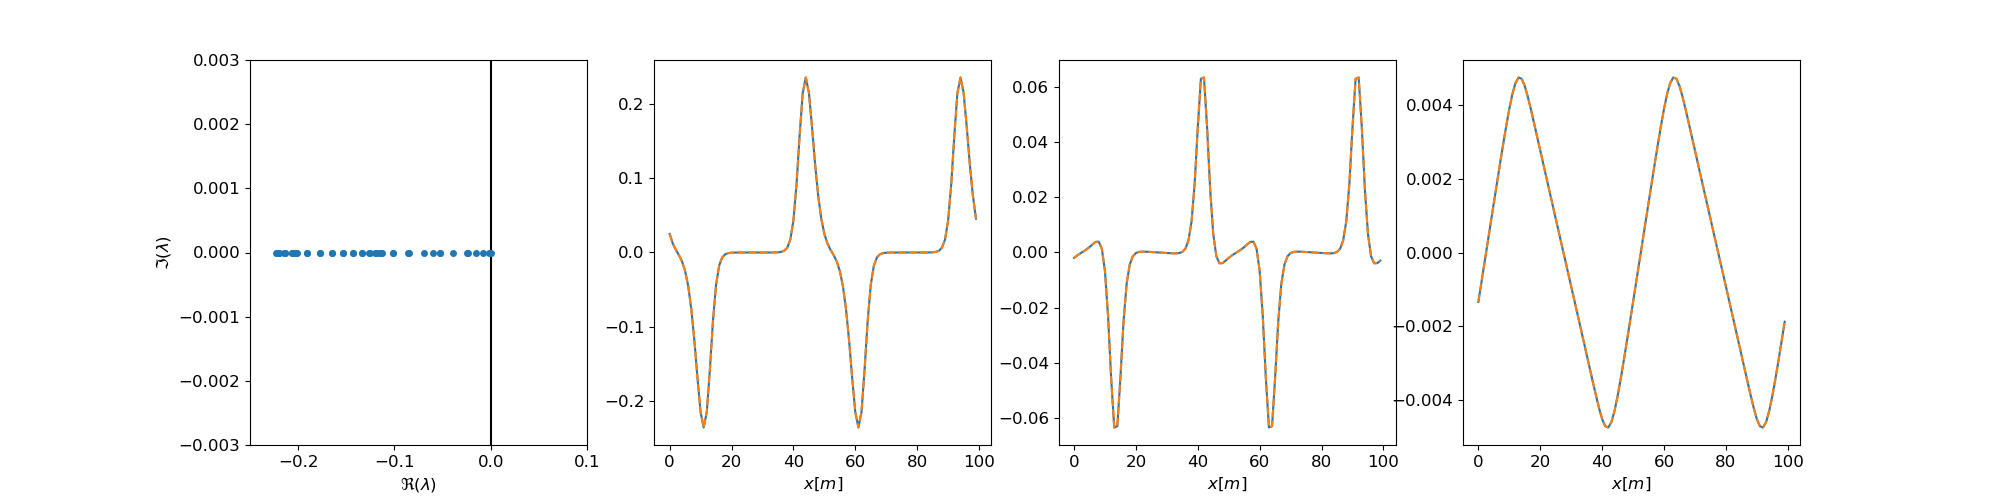

In [82]:
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)
N=P_mode_tot[n_mode][ind,:].T.shape[0]
print(N)
x=np.arange(0,L,L/N)
dx=L/N
#evaluation of the derivatives
q = (2*np.pi/L)*np.linspace(-int(N/2),int(N/2)-1,N)
P_k=np.fft.fftshift(np.fft.fft(np.squeeze(P_mode_tot[n_mode][ind])))
dPdx=np.fft.ifft(np.fft.ifftshift(1j*q*P_k))
W_k=np.fft.fftshift(np.fft.fft(np.squeeze(W_mode_tot[n_mode][ind])))
dWdx=np.fft.ifft(np.fft.ifftshift(1j*q*W_k))
O_k=np.fft.fftshift(np.fft.fft(np.squeeze(O_mode_tot[n_mode][ind])))
dOdx=np.fft.ifft(np.fft.ifftshift(1j*q*O_k))

ratioP=np.max(dPdx)/np.max(np.real(vec[:N,0]))
ratioW=np.max(dWdx)/np.max(np.real(vec[N:2*N,0]))
ratioO=np.max(dOdx)/np.max(np.real(vec[2*N:,0]))

fig,ax=plt.subplots(1,4,figsize=(20,5))
ax[0].plot(np.real(lmb)[:50],np.imag(lmb)[:50],marker='o',linestyle='none',markersize=4)
ax[0].set_xlim((-0.25,0.1))
ax[0].set_xlabel('$\Re (\lambda)$')
ax[0].set_ylabel('$\Im (\lambda)$')
ax[0].vlines(0,-1,1,color='black')
ax[0].set_ylim((-0.003,0.003))
#plt.savefig('eigenV.png')
ax[1].plot(x,np.real(vec[:N,0]),label='Biomass')
ax[1].plot(x,dPdx/ratioP,linestyle='dashed')
#ax[1].set_title('$\lambda $=  %.3f+(%.3f)i '%(lmb[0].real,lmb[0].imag))
ax[1].set_title(' Biomass $[g.m^{-2}]$')
ax[1].set_xlabel('$x [m]$')
ax[2].plot(x,np.real(vec[N:2*N,0]),label='Soil water')
ax[2].plot(x,dWdx/ratioW,linestyle='dashed')
ax[2].set_xlabel('$x [m]$')
ax[3].plot(x,np.real(vec[2*N:,0]),label='Surface water')
ax[3].plot(x,dOdx/ratioO,linestyle='dashed')
ax[3].set_xlabel('$x [m]$')
#ax.legend()
#fig.savefig('eigenVec.png')

[146]


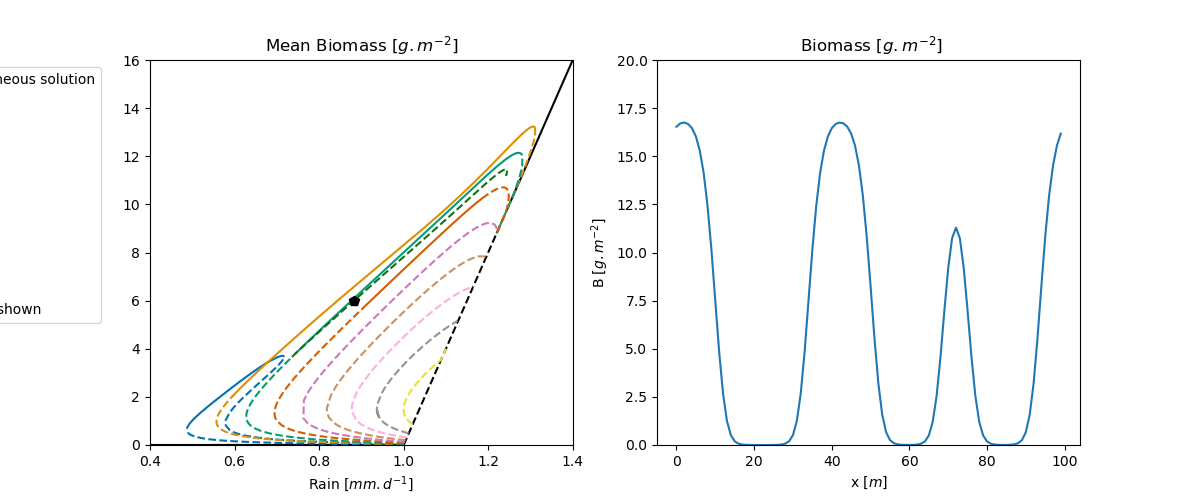

In [4]:
rain=1.05
eps=0.001
n=0
n_mode=12
ind=selec_rain(rain,4,6,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
N_mode_list=[0,1,2,3,4,5,6,7,8,9,12]

x=x/(2*np.pi)*L
fig,ax=plt.subplots(1,2,figsize=(12,5))
for i in (N_mode_list):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i])
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=8,color=color_mode[i],label=name_mode[i])  
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,16)
ax[0].plot(Rains_mode_tot[n_mode][ind],np.mean(P_mode_tot[n_mode][ind]),marker='p',color='black',linestyle='none',label='Solution shown',markersize=7)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$')
ax[0].set_xlabel('Rain $[mm.d^{-1}]$')
ax[0].legend(bbox_to_anchor=(-0.1,0.3))
ax[1].plot(x,np.squeeze(P_mode_tot[n_mode][ind]))
ax[1].set_title(' Biomass $[g.m^{-2}]$')
ax[1].set_xlabel('x $[m]$')
ax[1].set_ylabel('B $[g.m^{-2}]$')
ax[1].set_ylim((0,20))
plt.savefig('figure/MState_sol.pdf',dpi=500,bbox_inches='tight')

# Start from unstable mode
Essai rain=1.05, 1.15

In [36]:
rain=1.05
eps=0.01
n=0
n_mode=5
ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
print(ind)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=15000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
rain=R
Rf=R
prec=(R-Rf)*(1/(1+np.exp(0.001*(t-3000))))+Rf
#prec=R*np.ones(M)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind]*1+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind]*1+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind]*1+eps*np.real(vec[2*N:,n])
Sol=[]
n_run=1
for i in range(n_run):
    P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0+0*np.random.rand(N),W0+0*np.random.rand(N),O0+0*np.random.rand(N),param)
    Sol.append([P_full,W_full,O_full,R_full,t])
    

54
100


[]
[]


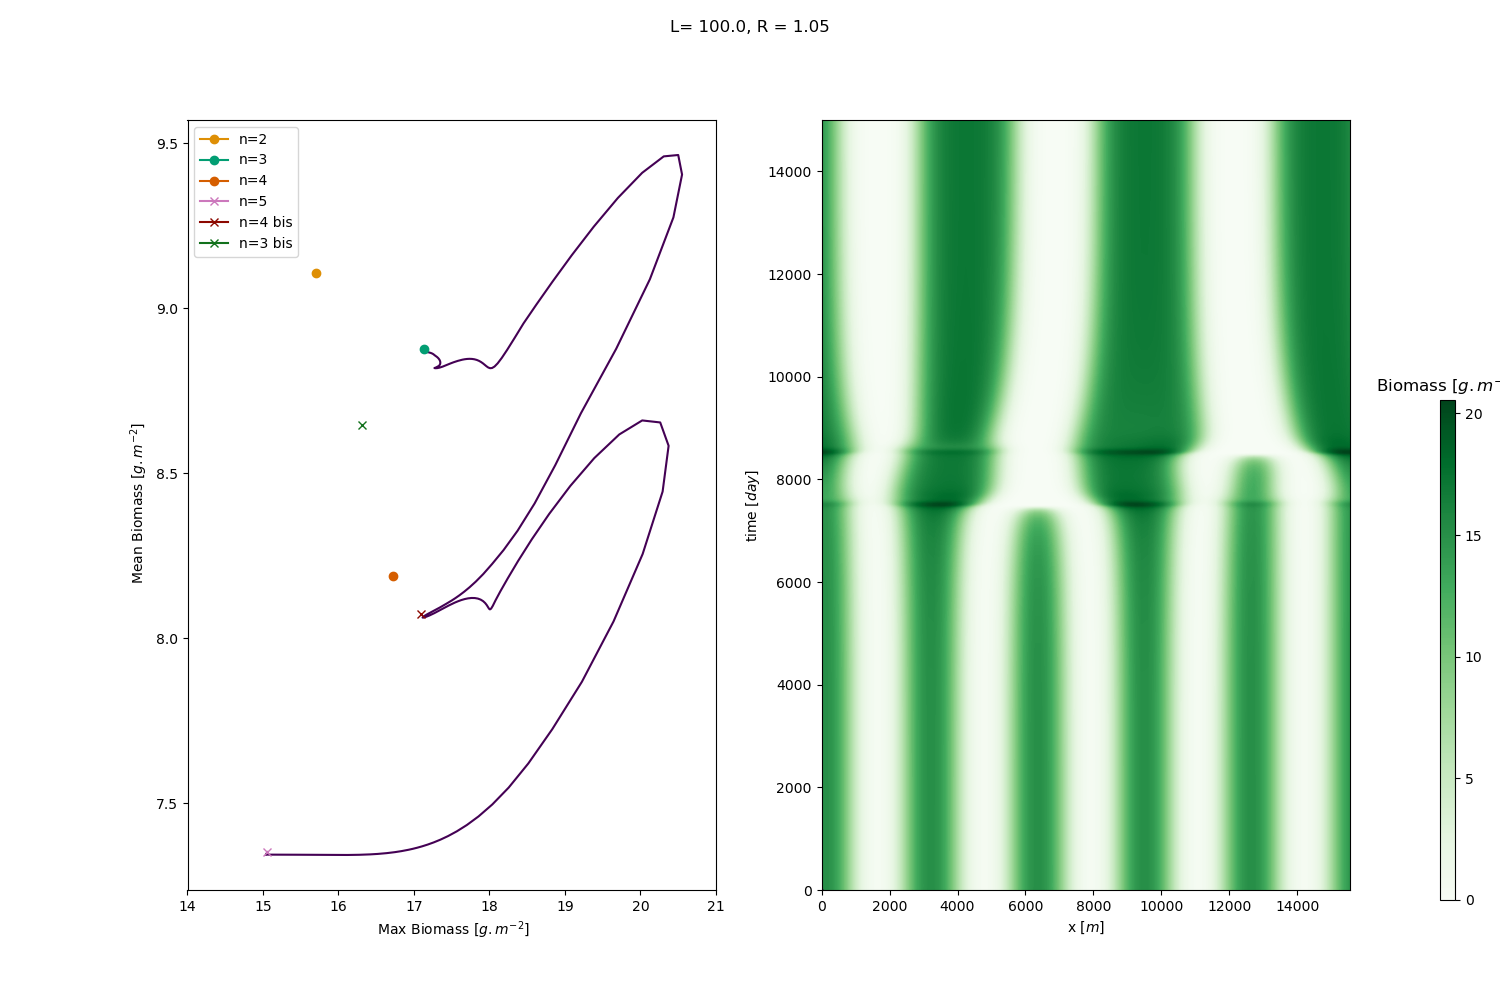

In [37]:
import matplotlib
k=np.linspace(0,n_run,n_run+1)
norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

x=np.arange(0,2*np.pi,dx)*(L/2*np.pi)

fig=plt.figure(figsize=(15,10))
fig.suptitle('L= %.1f, R = %.2f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

xx,tt=np.meshgrid(x*(L/(2*np.pi)),t)
for i in range(n_run):
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    c=np.linspace(-.001,np.max(np.max(Sol[0][0])),201)
    contB=ax2.contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.96, 0.1,0.01,0.5])    
    ticks_cbar=np.linspace(0,int(np.max(Sol[0][0])),5)
    cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
    cbar.ax.set_title('Biomass $[g.m^{-2}]$')
    ax2.set_xlabel('x $[m]$')
    ax2.set_ylabel('time $[day]$')

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax1.set_xlim((14,21))

j=0
Equi=[]
Equi2=[]
for n_mode in [2,3,4,5,-1,-2]:
    ind=selec_rain(rain,5,15,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    j=j+1
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
ax1.legend()

plt.savefig('figure/Unstable.png',dpi=300,bbox_inches='tight')

# Landing in n=4


In [ ]:
rain=1.13
eps=0.01
n=0
n_mode=5
ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
print(ind)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=15000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
rain=R
Rf=R
prec=(R-Rf)*(1/(1+np.exp(0.001*(t-3000))))+Rf
#prec=R*np.ones(M)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind]*0+0*eps*np.real(vec[:N,n])+np.cos(4*x)+1
W0=W_mode_tot[n_mode][ind]*0+0*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind]*0+0*np.real(vec[2*N:,n])
Sol=[]
n_run=1
for i in range(n_run):
    P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0+0*np.random.rand(N),W0+0*np.random.rand(N),O0+0*np.random.rand(N),param)
    Sol.append([P_full,W_full,O_full,R_full,t])
    

In [ ]:
fig1=plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode,5)
print(Sol[0][0].shape)
print(Sol[0][-1])
print(Sol[0][0])


In [ ]:
import matplotlib
k=np.linspace(0,n_run,n_run+1)
norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

x=np.arange(0,2*np.pi,dx)*(L/2*np.pi)

fig=plt.figure(figsize=(15,10))
fig.suptitle('L= %.1f, R = %.5f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

xx,tt=np.meshgrid(x*(L/(2*np.pi)),t)
for i in range(n_run):
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    c=np.linspace(-.001,np.max(np.max(Sol[0][0])),201)
    contB=ax2.contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    ticks_cbar=np.linspace(0,int(np.max(Sol[0][0])),5)
    cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
    cbar.ax.set_title('Biomass $[g.m^{-2}]$')
    ax2.set_xlabel('x $[m]$')
    ax2.set_ylabel('time $[day]$')

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax1.set_xlim((1,25))

j=0
Equi=[]
Equi2=[]
for n_mode in [2,3,4,5,-1,-2]:
    ind=selec_rain(rain,5,15,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    j=j+1
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
ax1.legend()

plt.savefig('figure/road_to_4.png',dpi=300,bbox_inches='tight')

# Random initial conditions

In [101]:
with open("Noise_init/Sol2.bin", "rb") as data:
    Sol = pickle.load(data)
#print(Sol[0])

200
1.1


/tmp/ipykernel_122683/2544898256.py:62: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode],edgecolors= "black")
/tmp/ipykernel_122683/2544898256.py:63: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode],edgecolors= "black")


[]
[]


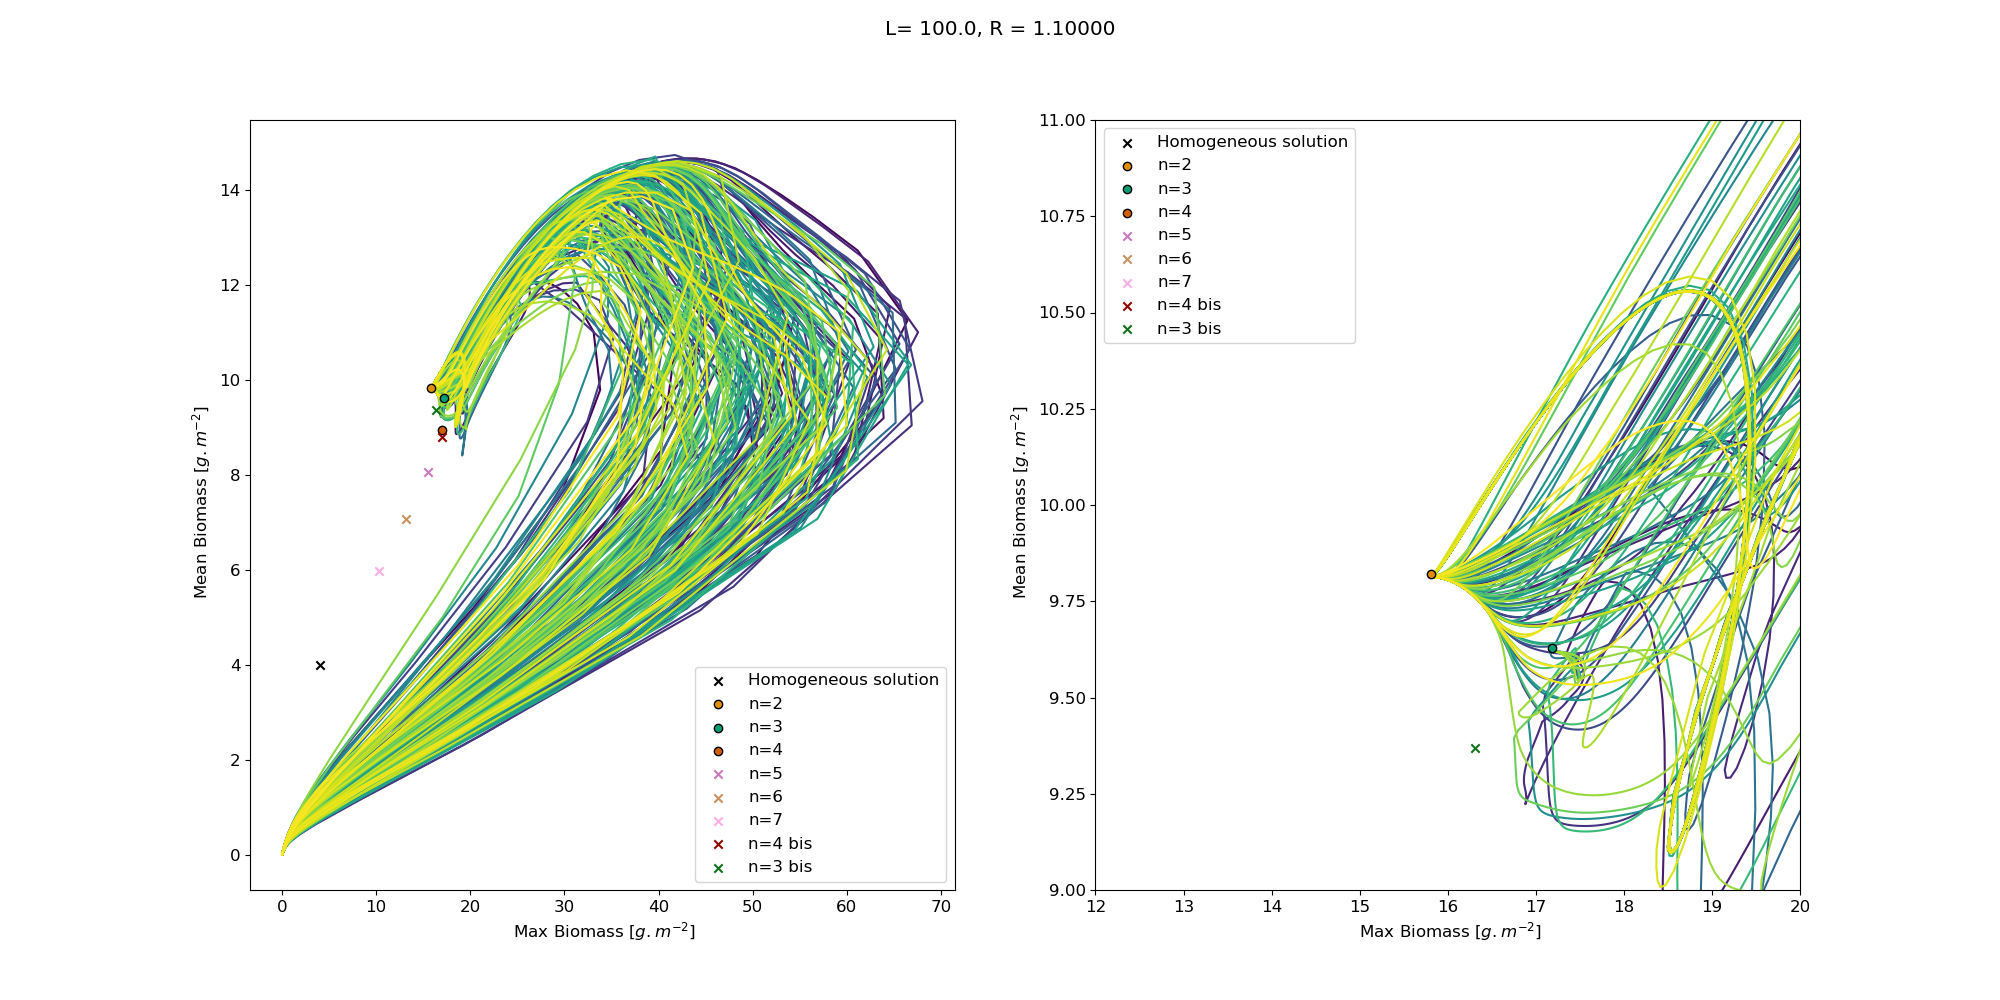

In [111]:
import matplotlib
n_run=len(Sol)
print(n_run)
rain=Sol[0][3][0]
print(rain)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=5000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)

k=np.linspace(0,n_run,n_run+1)
norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

fig=plt.figure(figsize=(20,10))
fig.suptitle('L= %.1f, R = %.5f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

for i in range(n_run):
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]),zorder=-1)
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]),zorder=-1)

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax2.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax2.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax2.set_xlim((12,20))
ax2.set_ylim((9,11))
j=0
Equi=[]
Equi2=[]

for n_mode in [0,2,3,4,5,6,7,-1,-2]:
    ind=selec_rain(rain,0,15,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.scatter(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode],edgecolors= "black")
    ax2.scatter(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode],edgecolors= "black")
    j=j+1

ax1.legend()
ax2.legend()
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
plt.savefig('figure/random.pdf',dpi=500,bbox_inches='tight')

In [ ]:
ind_n4=[]
n_mode=4
rain=Sol[0][-2][0]
print(rain)
#print(Sol[0][-1])
ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]

for i in range(len(Sol)):
    if np.mean(Sol[i][0][-1])>np.mean(P_mode_tot[n_mode][ind])-0.1 and np.mean(Sol[i][0][-1])<np.mean(P_mode_tot[n_mode][ind])+0.1:
        if np.max(Sol[i][0][-1])>np.max(P_mode_tot[n_mode][ind])-0.1 and np.max(Sol[i][0][-1])<np.max(P_mode_tot[n_mode][ind])+0.1:
            ind_n4.append(i)



ind_n3=[]
n_mode=3
rain=Sol[0][-2][0]
ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]

for i in range(len(Sol)):
    if np.mean(Sol[i][0][-1])>np.mean(P_mode_tot[n_mode][ind])-0.1 and np.mean(Sol[i][0][-1])<np.mean(P_mode_tot[n_mode][ind])+0.1:
        if np.max(Sol[i][0][-1])>np.max(P_mode_tot[n_mode][ind])-0.1 and np.max(Sol[i][0][-1])<np.max(P_mode_tot[n_mode][ind])+0.1:
            ind_n3.append(i)


ind_n2=[]
n_mode=2
rain=Sol[0][-2][0]
ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
for i in range(len(Sol)):
    if np.mean(Sol[i][0][-1])>np.mean(P_mode_tot[n_mode][ind])-0.1 and np.mean(Sol[i][0][-1])<np.mean(P_mode_tot[n_mode][ind])+0.1:
        if np.max(Sol[i][0][-1])>np.max(P_mode_tot[n_mode][ind])-0.1 and np.max(Sol[i][0][-1])<np.max(P_mode_tot[n_mode][ind])+0.1:
            ind_n2.append(i)



In [ ]:
import matplotlib
n_run=len(Sol)
print(n_run)
rain=Sol[0][3][0]
print(rain)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=5000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)

k=np.linspace(0,n_run,n_run+1)
norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

fig=plt.figure(figsize=(20,10))
fig.suptitle('L= %.1f, R = %.5f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

rank_2=0
rank_3=0
for i in range(n_run):
    if i == ind_n2[rank_2]:
        ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=color_mode[2])
        ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=color_mode[2])
        rank_2+=1
    else:
        ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=color_mode[3])
        ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=color_mode[3])
        rank_3+=1
        
ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax2.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax2.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax2.set_xlim((12,20))
ax2.set_ylim((9,11))
j=0
Equi=[]
Equi2=[]

for n_mode in [0,2,3,4,5,6,7,-1,-2]:
    ind=selec_rain(rain,0,15,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    ax2.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    j=j+1

ax1.legend()
ax2.legend()
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
plt.savefig('figure/random_1.pdf',dpi=500,bbox_inches='tight')

In [ ]:
Sol_name=['Sol1.bin','Sol2.bin','Sol3.bin','Sol4.bin','Sol5.bin','Sol6.bin','Sol7.bin','Sol8.bin','Sol9.bin','Sol10.bin','Sol11.bin','Sol12.bin','Sol13.bin','Sol14.bin']

fig, axs = plt.subplots(len(Sol_name), 2, figsize=(10,20),sharey=True, tight_layout=True)

for j in range(len(Sol_name)):
    with open(Sol_name[j], "rb") as data:
        Sol = pickle.load(data)
    #Disribution des solutions
    P_sol_final=np.zeros((len(Sol),len(Sol[0][0][0])))
    for i in range(len(Sol)):
        P_sol_final[i][:]=Sol[i][0][-1]
    axs[j,0].hist(np.mean(P_sol_final,axis=1))
    axs[j,1].hist(np.max(P_sol_final,axis=1))




In [ ]:
import matplotlib
n_run=len(Sol)
print(n_run)
rain=Sol[0][3][0]
print(rain)
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=5000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)

k=np.linspace(0,n_run,n_run+1)
norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.viridis
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

fig=plt.figure(figsize=(20,10))
fig.suptitle('L= %.1f, R = %.5f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

for i in ind_n4:
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax2.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax2.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax2.set_xlim((12,20))
ax2.set_ylim((7,11))
j=0
Equi=[]
Equi2=[]
for n_mode in [2,3,4,5,6,7,-1,-2]:
    ind=selec_rain(rain,3,15,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    ax2.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    j=j+1

print(np.squeeze(Equi))
print(np.squeeze(Equi2))

In [ ]:
print(len(Sol))
fig,axes=plt.subplots(10,50,figsize=(50,10))
xx,tt=np.meshgrid(x*(L/(2*np.pi)),Sol[0][-1])
#print(t)
#print(t.shape)
#print(Sol[0][0][0].shape)
#ax[0,0].plot(x,Sol[0][0][-1])
i=0
levels = np.linspace(0,25,26)
for ax in axes.flat:
    contB=ax.contourf(xx,tt,Sol[i][0],levels=levels, extend='max')
    i=i+1
    #ax.plot(Sol[0][0][-1])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.subplots_adjust(right=0.9,left=0.01,bottom=0.01,top=0.99)
cax = plt.axes([0.93, 0.3,0.01,0.6])    
ticks_cbar=np.linspace(0,25,101)
cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=levels)
plt.savefig('figure/evol_mult.png',dpi=100,bbox_inches='tight')


100
100


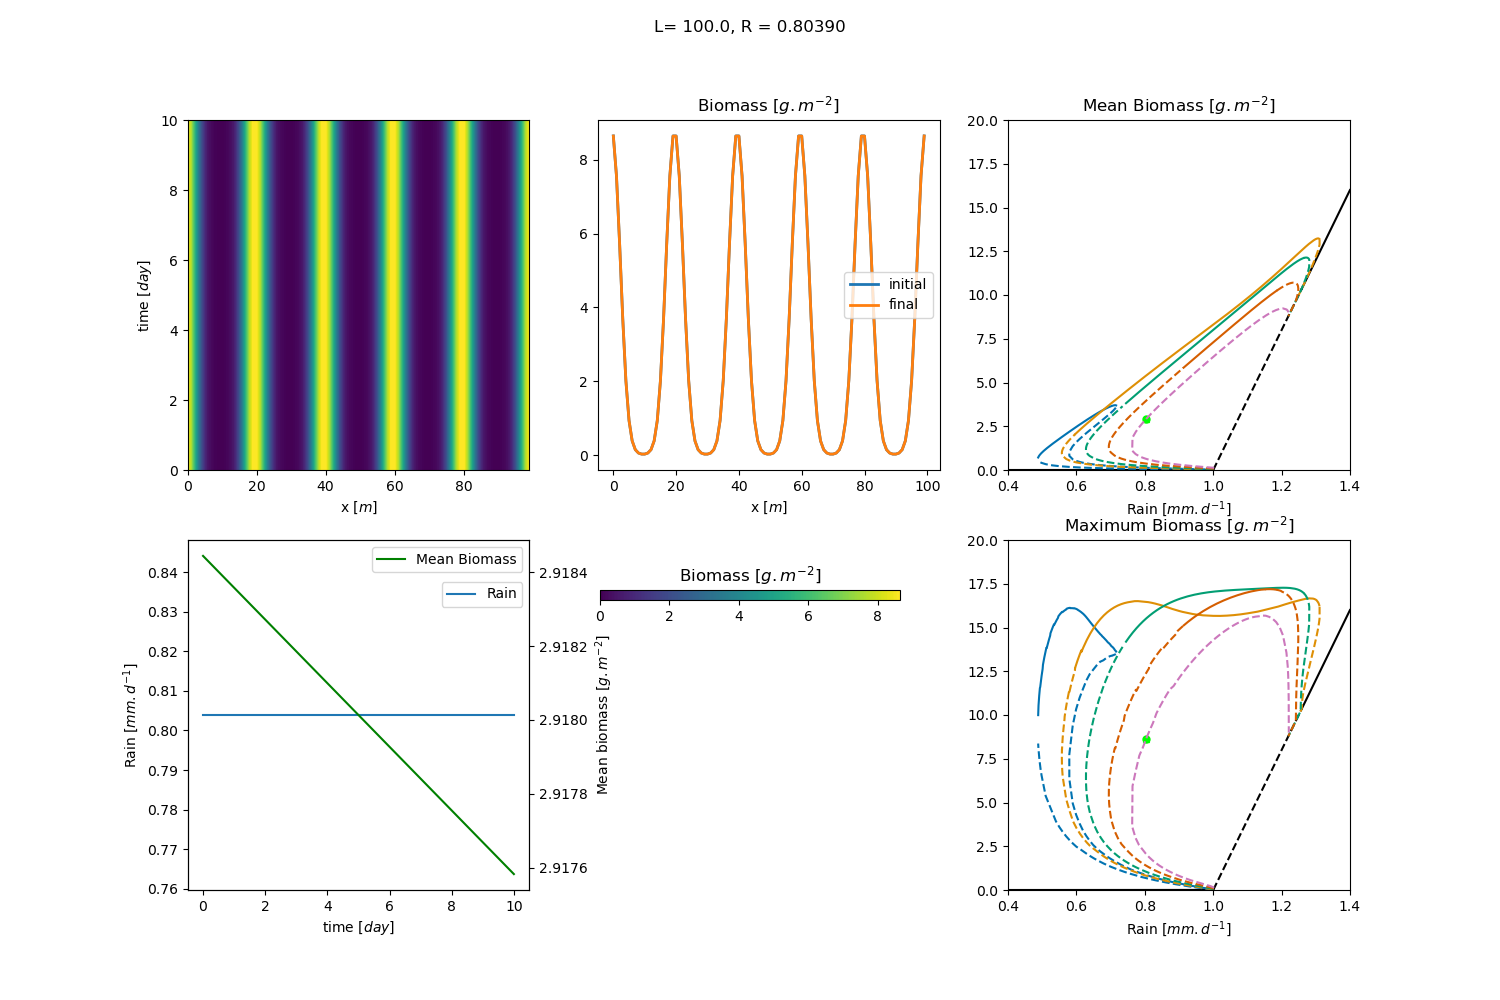

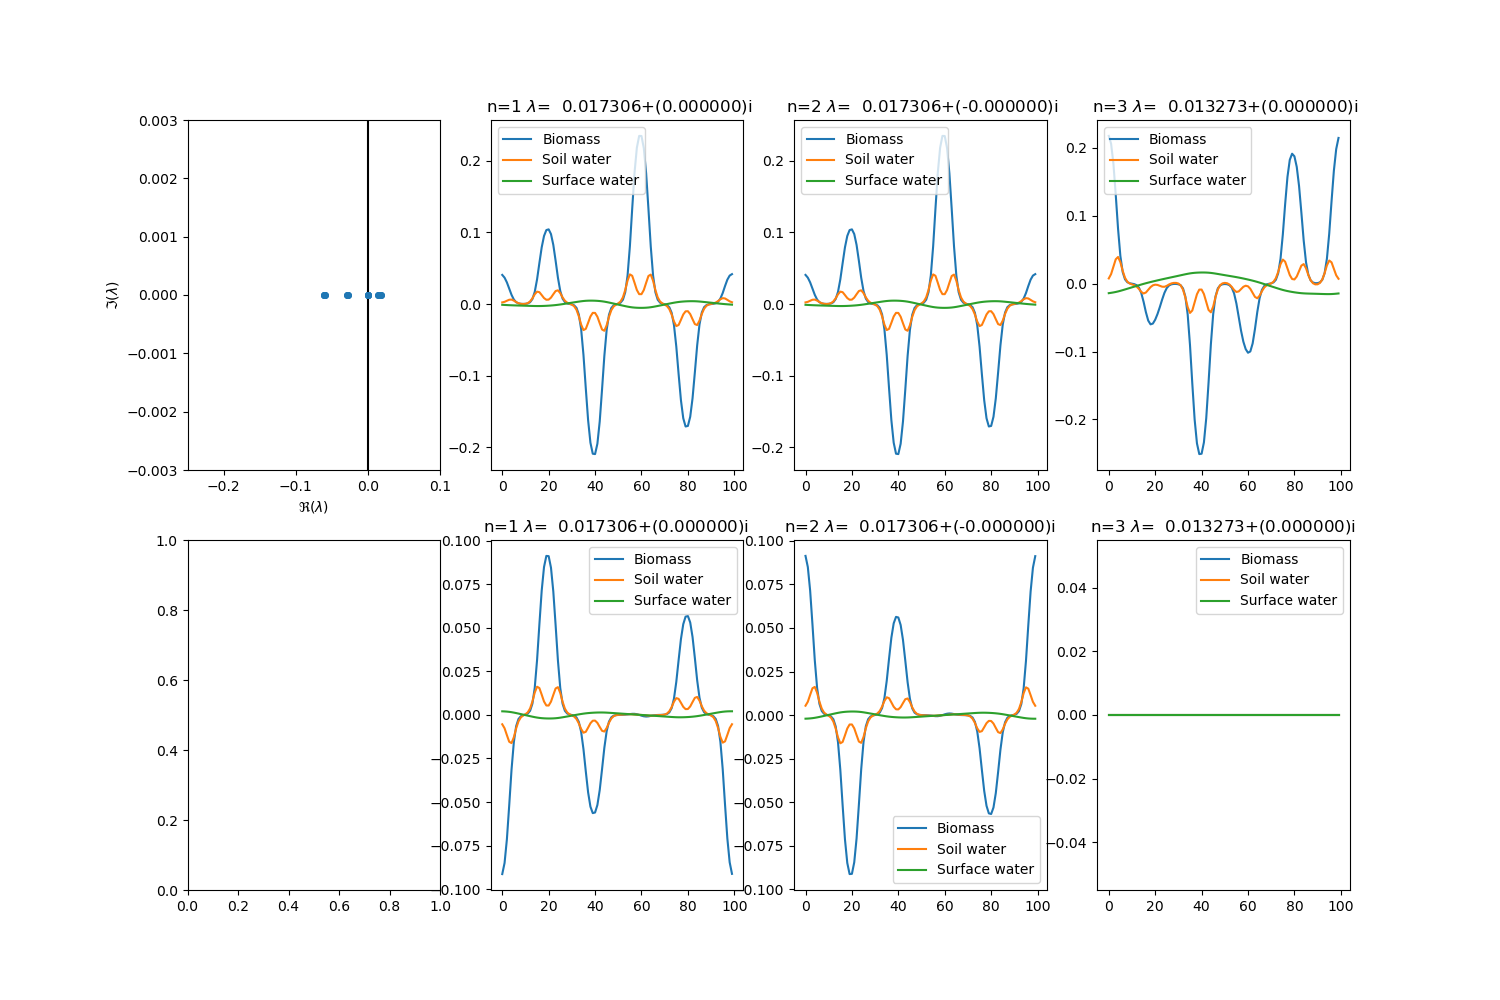

In [5]:
rain=0.8
eps=0.0001
n=0
n_mode=5
ind=selec_rain(rain,1,3,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=10
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
Rf=0.8
prec=(R-Rf)*(1/(1+np.exp(0.01*(t-2500))))+Rf
prec=R*np.ones(M)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind,:][0]+eps*np.real(vec[2*N:,n])
P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0,W0,O0,param)

fig1=plot_dynamical_transient(Rains_mode_tot,P_mode_tot,Stab_mode_tot,n_mode,ind,P_full,R_full,x,L,t,name_mode,color_mode,6)
#plt.savefig('fig12.svg')
show_stability_single(R_full[0],P_full[0,:],W_full[0,:],O_full[0,:],param,L)

